<a href="https://colab.research.google.com/github/bmustafa225/DS-Portfollio/blob/main/DS_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is created to try various visualization methods and do EDA using basic visualization.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
ds_df=pd.read_csv('ds_salaries.csv')
ds_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
ds_df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
ds_df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
year_df=ds_df.groupby(['work_year'])['employment_type'].count()
year_df

work_year
2020     72
2021    217
2022    318
Name: employment_type, dtype: int64

In [ ]:
emp_df=ds_df.groupby(['work_year','experience_level'])['employment_type'].count().reset_index()
emp_df['experience_level']=emp_df['experience_level'].apply(lambda x: 'Entry Level' if x =='EN' else('Mid-Level' if x=='MI' else('Senior Level' if x=='SE' else 'Executive Level') ))
emp_df

,work_year,experience_level,employment_type
0,2020,Entry Level,20
1,2020,Executive Level,2
2,2020,Mid-Level,32
3,2020,Senior Level,18
4,2021,Entry Level,47
5,2021,Executive Level,11
6,2021,Mid-Level,90
7,2021,Senior Level,69
8,2022,Entry Level,21
9,2022,Executive Level,13


In [ ]:
sal_df=ds_df.groupby(['work_year','experience_level'])['salary_in_usd'].mean().reset_index()
sal_df['experience_level']=sal_df['experience_level'].apply(lambda x: 'Entry Level' if x =='EN' else('Mid-Level' if x=='MI' else('Senior Level' if x=='SE' else 'Executive Level') ))


<Figure size 432x288 with 0 Axes>

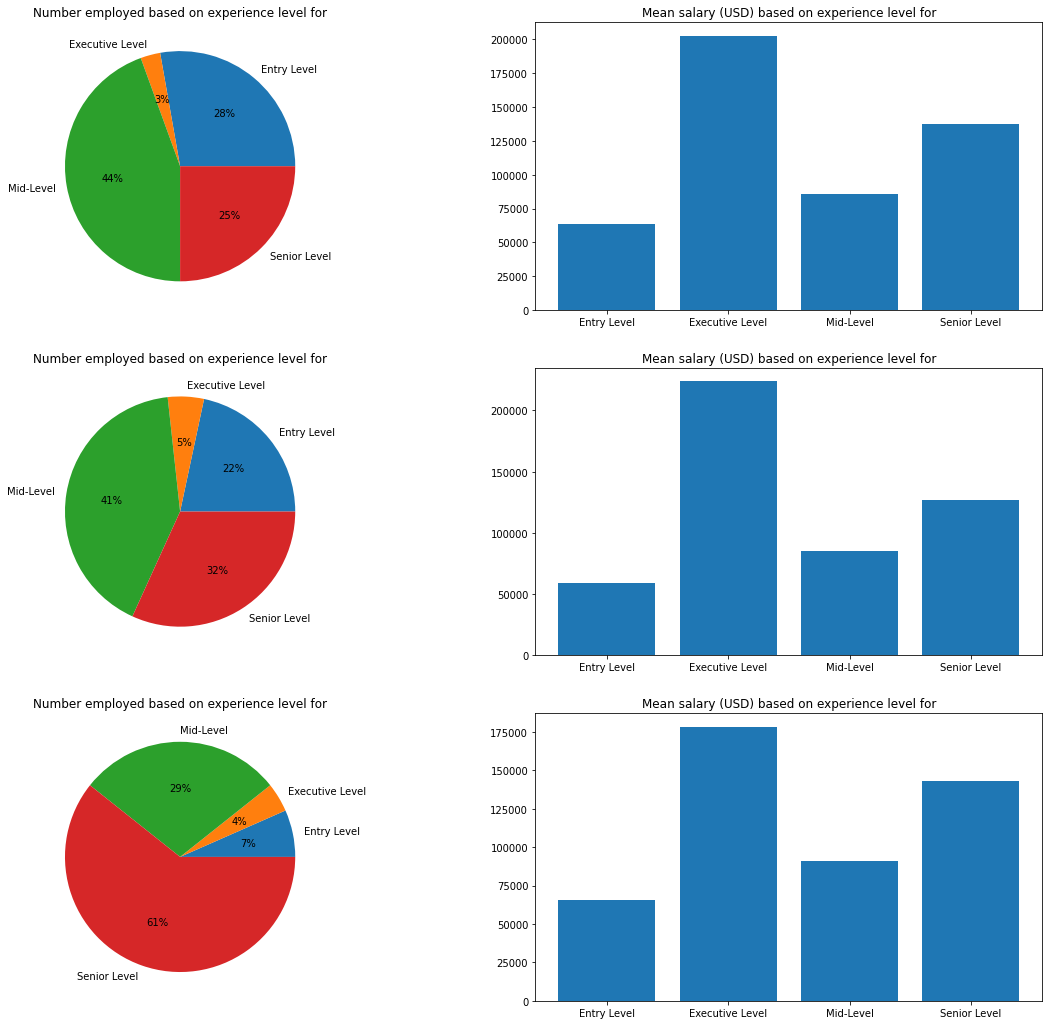

In [ ]:
fig=plt.figure()
fig,axs=plt.subplots(3,2,figsize=(20,18))
year=2020
for i in [0,1,2]:
  plt_emp=emp_df[emp_df.work_year==year]
  plt_sal=sal_df[sal_df.work_year==year]
  yr=str(year)
  for j in [0,1]:
    if j==0:
      #axs[i,j].bar(plt_emp.experience_level,plt_emp.employment_type)
      axs[i,j].pie(plt_emp['employment_type'],labels=plt_emp['experience_level'].unique(),autopct='%.0f%%') 
      axs[i,j].set_title('Number employed based on experience level for')
    else:
      axs[i,j].bar(plt_sal.experience_level,plt_sal.salary_in_usd)
      axs[i,j].set_title('Mean salary (USD) based on experience level for')
  year=year+1

In [ ]:
agg_exp=ds_df.groupby(['experience_level'])['employment_type'].count().reset_index()
agg_exp['experience_level']=agg_exp['experience_level'].apply(lambda x: 'Entry Level' if x =='EN' else('Mid-Level' if x=='MI' else('Senior Level' if x=='SE' else 'Executive Level') ))

agg_sal=ds_df.groupby(['experience_level'])['salary_in_usd'].mean().reset_index()
agg_sal['experience_level']=agg_sal['experience_level'].apply(lambda x: 'Entry Level' if x =='EN' else('Mid-Level' if x=='MI' else('Senior Level' if x=='SE' else 'Executive Level') ))

In [ ]:
agg_exp

,experience_level,employment_type
0,Entry Level,88
1,Executive Level,26
2,Mid-Level,213
3,Senior Level,280


IndexError: ignored

<Figure size 432x288 with 0 Axes>

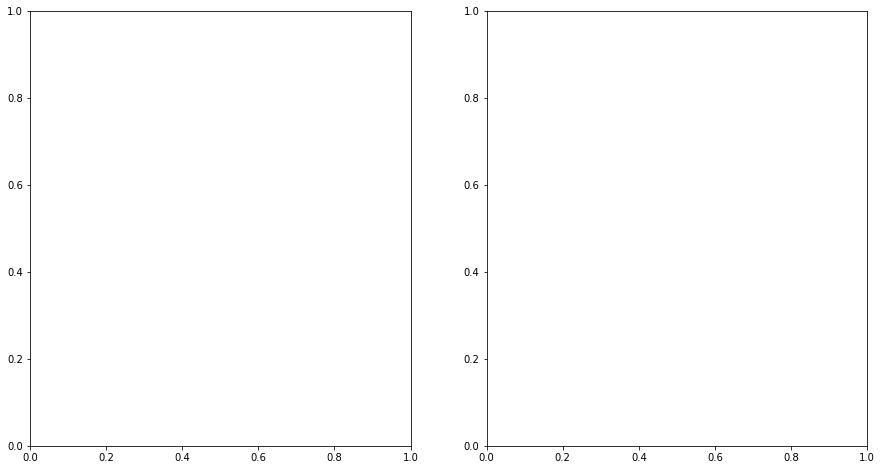

In [ ]:
fig=plt.figure()
fig,axs=plt.subplots(1,2,figsize=(15,8))
axs[0,0].pie(agg_exp['employment_type'],labels=agg_exp['experience_level'],autopct='%.0f%%')
axs[0,1].bar(agg_sal.experience_level,agg_sal.salary_in_usd)

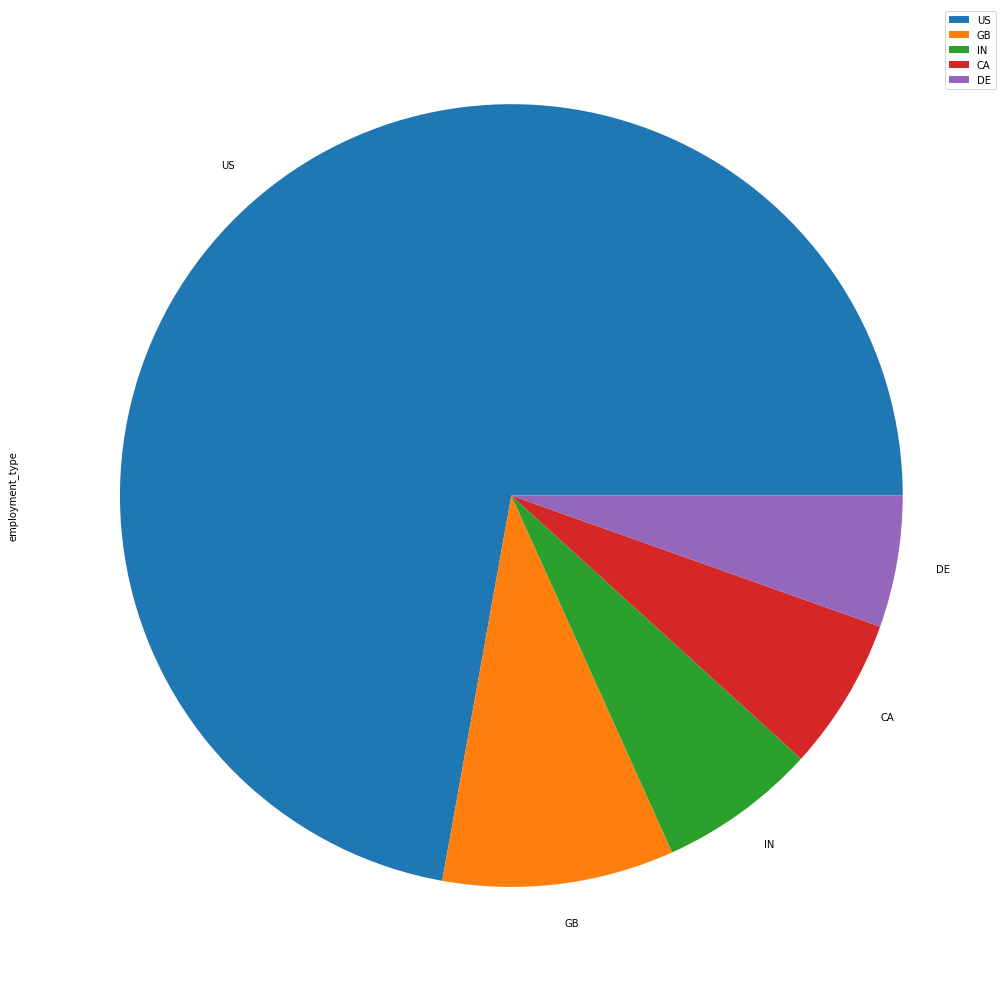

In [ ]:
empres_df=ds_df.groupby(['employee_residence'])['employment_type'].count().nlargest(5)
empres_df.plot(x='employee_residence',y='employment_type',kind='pie',figsize=(20,18),legend=True)

In [ ]:
import plotly.express as px
fig = px.sunburst(ds_df, path=['work_year', 'company_location', 'company_size'], values='salary_in_usd')
fig.show()

In [ ]:
new_df=ds_df.groupby(['experience_level','employment_type'])['salary_in_usd'].mean().reset_index()

In [ ]:
fig = px.sunburst(new_df, path=['experience_level', 'employment_type'], values='salary_in_usd')
fig.show()

In [ ]:
ds_df['remote_ratio']=ds_df['remote_ratio'].apply(lambda x: 'No Remote' if x==0 else('Partially Remote' if x==50 else 'Fully Remote'))
ratio_df=ds_df.groupby(['experience_level','remote_ratio'])['employment_type'].count().reset_index()
ratio_df

,experience_level,remote_ratio,employment_type
0,EN,Fully Remote,49
1,EN,No Remote,14
2,EN,Partially Remote,25
3,EX,Fully Remote,18
4,EX,No Remote,3
5,EX,Partially Remote,5
6,MI,Fully Remote,115
7,MI,No Remote,56
8,MI,Partially Remote,42
9,SE,Fully Remote,199


<Figure size 432x288 with 0 Axes>

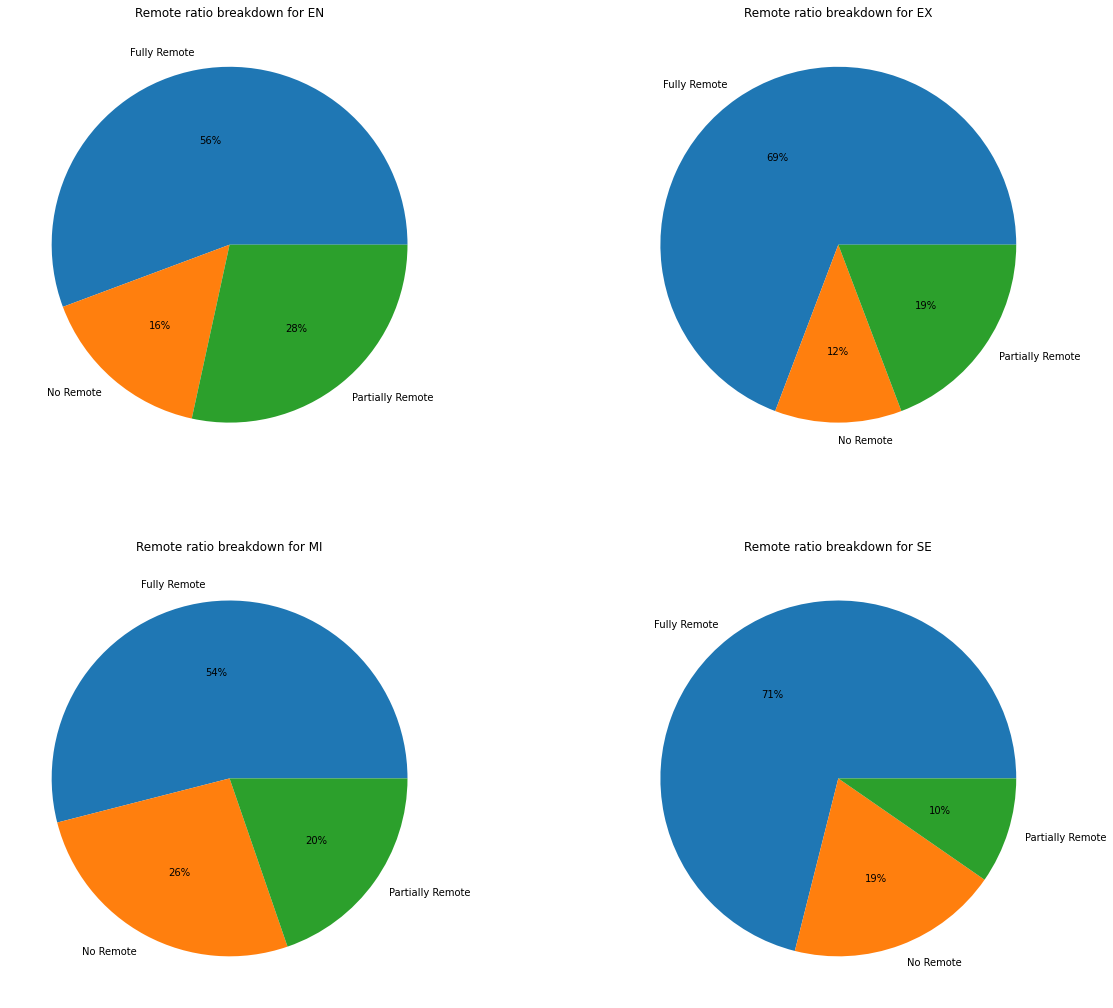

In [ ]:

fig=plt.figure()
fig,axs=plt.subplots(2,2,figsize=(20,18))
i=0
for i in [0,1]:
  if i == 0:
    for j,lvl in enumerate(['EN','EX']):
      pie_df=ratio_df[ratio_df['experience_level']==lvl]
      axs[i,j].pie(pie_df['employment_type'],labels=pie_df['remote_ratio'].unique(),autopct='%.0f%%') 
      if j== 0:
        axs[i,j].set_title('Remote ratio breakdown for EN')
      else:
        axs[i,j].set_title('Remote ratio breakdown for EX')

  else:
    for j,lvl in enumerate(['MI','SE']):
      pie_df=ratio_df[ratio_df['experience_level']==lvl]
      axs[i,j].pie(pie_df['employment_type'],labels=pie_df['remote_ratio'].unique(),autopct='%.0f%%')
      if j== 0:
        axs[i,j].set_title('Remote ratio breakdown for MI')
      else:
        axs[i,j].set_title('Remote ratio breakdown for SE')

As is evident by the pie charts above Remote Work is the most common work type amongst all experience level, followed by partial remote as the next option.

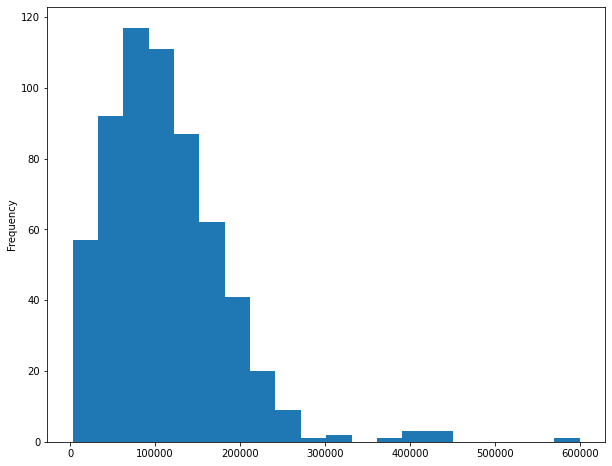

In [ ]:
ds_df['salary_in_usd'].plot(kind='hist',bins=20,figsize=(10,8))